<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimental Analysis of Book Reviews with Bidirectional LSTM


The project deals with sentimental classification of book reviews where ratings-(4,5) are grouped as 1 indicating above average and ratings below 4 as grouped to 0. 

### Dataset

* The dataset is downloaded from kaggle <a href = 'https://www.kaggle.com/competitions/goodreads-books-reviews-290312/overview'>here</a>. 
* Review and rating columns are consdered. 400000 tuples are considered for this experimentation. 

## Dataset 




In [ ]:
import os 
os.environ['KAGGLE_USERNAME'] = 'pkpbam'  
os.environ['KAGGLE_KEY'] = '3de4136ab536ed90dc2aabdf917dbc1c' 
# !kaggle datasets download -d meetnagadia/amazon-kindle-book-review-for-sentiment-analysis
# ! kaggle competitions download -c goodreads-books-reviews-290312
# !kaggle datasets download -d aravindanr22052001/abbreviations-wordlist

  0% 0.00/3.04k [00:00<?, ?B/s]
100% 3.04k/3.04k [00:00<00:00, 2.53MB/s]


In [ ]:
# import zipfile 
# folder_path = '/content/drive/MyDrive/Projects/sentiment_analysis/' 
# zip_path = '/content/drive/MyDrive/Projects/sentiment_analysis/abbreviations-wordlist.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:                                            
#   zip_ref.extractall(folder_path) 

In [ ]:
import spacy 
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt    
import seaborn as sns              
import tensorflow as tf        
import os                        
import nltk
import warnings                      
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# from IPython import as plt
# warnings.filterwarnings('ignore')
# display.set_matplotlib_formats('svg') 
 
from sklearn.model_selection import train_test_split        

folder_path = '/content/drive/MyDrive/Projects/sentiment_analysis/' 

dtypes_b = {
    'review_text':'string', 
    'rating':'int32', 
}  
df= pd.read_csv(folder_path+ 'goodreads_train.csv', usecols=['rating', 'review_text'], dtype = dtypes_b)

### About the Dataset 




In [ ]:
df = df[:400000]                    

In [ ]:
print(f" shape:{df.shape}") 
print("value_counts:")
print(df.rating.value_counts())      
df.head() 

 shape:(400000, 2)
value_counts:
4    140222
5    116614
3     85509
2     32445
0     12619
1     12591
Name: rating, dtype: int64


,rating,review_text
0,5,This is a special book. It started slow for ab...
1,3,Recommended by Don Katz. Avail for free in Dec...
2,3,"A fun, fast paced science fiction thriller. I ..."
3,0,Recommended reading to understand what is goin...
4,4,"I really enjoyed this book, and there is a lot..."


## Data Preprocessing

In [ ]:
import re
# lower case the sentences
df['review_text'] = df['review_text'].apply(lambda x:x.lower())
# remove multiple spaces
df['review_text'] = df['review_text'].apply(lambda x: " ".join(x.split()))
# Remove urls 
df['review_text'] = df['review_text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))
# # Remove punctuations
df['review_text'] = df['review_text'].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))
# Remove html tags
from bs4 import BeautifulSoup
df['review_text'] = df['review_text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
# remove stopwords
from spacy.lang.en.stop_words import STOP_WORDS
df['review_text'] = df['review_text'].apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )
# lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') 
lemmatizer = WordNetLemmatizer()
df['review_text'] = df['review_text'].apply(lambda x:lemmatizer.lemmatize(x))

# # Rare word removal 
import nltk 
nltk.download('punkt') 
tokens = " ".join(df['review_text']) 
freq_dist = nltk.FreqDist(nltk.word_tokenize(tokens))
rarewords = list(freq_dist.keys())[-50:]
df['review_text'] = df['review_text'].apply(lambda x: '' if x in rarewords else x ) 


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.to_csv(folder_path + 'p_4l.txt')

## Embedding Layer

In [ ]:
# tokens = ' '.join(df['review_text'])
# tokens = nltk.word_tokenize(tokens)
# print(f" length of tokens{len(tokens)}" )
# wc = WordCloud()                            
# wc.generate(str(tokens))              
# plt.imshow(wc, interpolation='bilinear');

<pre>
All reviews are classified into 2 categories: reviews with rating 4,5 are above average(1),
reviews </pre>

In [ ]:
# classifying into above average and average
df['rating'] = df['rating'].apply(lambda x: 0 if x <4  else 1) 

In [ ]:
df.rating.value_counts()

1    256836
0    143164
Name: rating, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['review_text'].to_numpy(), df['rating'].to_numpy(), test_size=0.20, random_state=42)
len(x_train), len(y_train), len(x_test), len(y_test) 

(320000, 320000, 80000, 80000)

In [ ]:
# Converting Text into numbers- 
# Text vectorization

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Find average number of tokens (words) in training tweets
x = round(sum([len(i.split()) for i in x_train])/len(x_train))
print(x)             

81


In [ ]:
x_train[0]

'two-second recap paradise evocative coming-of-age debut novel readers means person allowed peek curtain powerful intriguing family things perfect paradise review probably preface review admitting big fan brideshead revisited certain degree beauty nostalgia heartbreak experienced charles ryder interactions marchmain family learned paradise loosely inspired brideshead immediately knew wanted read book unreservedly chelsey philpot built foundations classic novel shes created hauntingly beautiful world filled characters struggles makes story stand right philpot introduces charlotte charlie ryder talented young artist meets fellow boarding school classmate julia buchanan twist fate charlies lower middle-class family new hampshire long julias world old money excess begins dazzle charlie charlies friendship julia develops learns cracks perfect buchanan facade so-called paradise isnt immune realities world realities beginning catch philpot wonderful job playing age-old idea outsider looking h

After experimentation with different range of values, max_vocab_length and size of the embedding is chosen. 

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 80 
embed_size = 100
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length=max_length)
# Fit textvectorizer 
text_vectorizer.adapt(x_train)
# Creating an embedding layer

tf.random.set_seed(42) 
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=embed_size, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 



## Bidirectional LSTM

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_b = tf.keras.Model(inputs, outputs, name="model_b_LSTM") 

model_b.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_b_history = model_b.fit(x_train, 
                              y_train,
                              epochs=1,
                              validation_data=(x_test, y_test)) 

15000/15000 [==============================] - 230s 15ms/step - loss: 0.4495 - accuracy: 0.7858 - val_loss: 0.4287 - val_accuracy: 0.7989


In [ ]:
model_c_history = model_b.fit(x_train,
                              y_train,
                              epochs=4,
                              validation_data=(x_test, y_test))

Epoch 1/4
15000/15000 [==============================] - 232s 15ms/step - loss: 0.3655 - accuracy: 0.8354 - val_loss: 0.4654 - val_accuracy: 0.7961
Epoch 2/4
15000/15000 [==============================] - 225s 15ms/step - loss: 0.3515 - accuracy: 0.8417 - val_loss: 0.4360 - val_accuracy: 0.7981
Epoch 3/4
15000/15000 [==============================] - 229s 15ms/step - loss: 0.3156 - accuracy: 0.8609 - val_loss: 0.4847 - val_accuracy: 0.7887
Epoch 4/4
15000/15000 [==============================] - 228s 15ms/step - loss: 0.2781 - accuracy: 0.8799 - val_loss: 0.5136 - val_accuracy: 0.7836


 
Above model yields on an average 79% accuracy. 

## Stacked Bidirectional LSTM

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.LSTM(32, return_sequences =True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x) 
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_c = tf.keras.Model(inputs, outputs, name="model_c_LSTM") 
model_c.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_c_history = model_c.fit(x_train,
                              y_train,
                              epochs=5,
                              validation_data=(x_test, y_test)) 

Epoch 1/5
10000/10000 [==============================] - 305s 29ms/step - loss: 0.4598 - accuracy: 0.7807 - val_loss: 0.4349 - val_accuracy: 0.7963
Epoch 2/5
10000/10000 [==============================] - 285s 28ms/step - loss: 0.4126 - accuracy: 0.8080 - val_loss: 0.4210 - val_accuracy: 0.8026
Epoch 3/5
10000/10000 [==============================] - 285s 29ms/step - loss: 0.3824 - accuracy: 0.8257 - val_loss: 0.4252 - val_accuracy: 0.7999
Epoch 4/5
10000/10000 [==============================] - 281s 28ms/step - loss: 0.3519 - accuracy: 0.8417 - val_loss: 0.4404 - val_accuracy: 0.7965
Epoch 5/5
10000/10000 [==============================] - 300s 30ms/step - loss: 0.3193 - accuracy: 0.8588 - val_loss: 0.4667 - val_accuracy: 0.7911


The stacked bidirectional LSTM has resulted in 80% accuracy

### Parameter Search

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x) 
x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.LSTM(32, return_sequences =True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x) 
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_d = tf.keras.Model(inputs, outputs, name="model_d_LSTM") 
model_d.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_d_history = model_d.fit(x_train,
                              y_train,
                              epochs=2,
                              validation_data=(x_test, y_test)) 

Epoch 1/2
10000/10000 [==============================] - 288s 28ms/step - loss: 0.2867 - accuracy: 0.8786 - val_loss: 0.6711 - val_accuracy: 0.7648
Epoch 2/2
10000/10000 [==============================] - 278s 28ms/step - loss: 0.2904 - accuracy: 0.8759 - val_loss: 0.4675 - val_accuracy: 0.7818


In [ ]:
model_d_history = model_d.fit(x_train,
                              y_train,
                              epochs=3,
                              validation_data=(x_test, y_test))

Epoch 1/3
10000/10000 [==============================] - 279s 28ms/step - loss: 0.2389 - accuracy: 0.9003 - val_loss: 0.6623 - val_accuracy: 0.7599
Epoch 2/3
10000/10000 [==============================] - 280s 28ms/step - loss: 0.2421 - accuracy: 0.8987 - val_loss: 0.5383 - val_accuracy: 0.7745
Epoch 3/3
10000/10000 [==============================] - 281s 28ms/step - loss: 0.2312 - accuracy: 0.9033 - val_loss: 0.6419 - val_accuracy: 0.7744


In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Dropout(0.2)(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x) 
outputs = layers.Dense(1, activation="sigmoid")(x) 
model_e = tf.keras.Model(inputs, outputs, name="model_c_LSTM") 
model_e.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_e_history = model_e.fit(x_train,
                              y_train,
                              epochs=5,
                              validation_data=(x_test, y_test)) 

Epoch 1/5
10000/10000 [==============================] - 268s 21ms/step - loss: 0.2575 - accuracy: 0.8923 - val_loss: 0.6394 - val_accuracy: 0.7713
Epoch 2/5
10000/10000 [==============================] - 211s 21ms/step - loss: 0.2394 - accuracy: 0.9005 - val_loss: 0.5778 - val_accuracy: 0.7735
Epoch 3/5
10000/10000 [==============================] - 210s 21ms/step - loss: 0.2226 - accuracy: 0.9077 - val_loss: 0.6427 - val_accuracy: 0.7676
Epoch 4/5
10000/10000 [==============================] - 212s 21ms/step - loss: 0.1977 - accuracy: 0.9187 - val_loss: 0.6492 - val_accuracy: 0.7638
Epoch 5/5
10000/10000 [==============================] - 242s 24ms/step - loss: 0.1761 - accuracy: 0.9282 - val_loss: 0.7599 - val_accuracy: 0.7627


* No progressive change in the result is observed.
* Thus bidirectional stacked LSTM has performed better. 

In [ ]:
# after this experiment : chapter close: set batch size :
model_c.save("models/model_c.tf") 

In [ ]:
# plot curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss 
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy') 
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();  

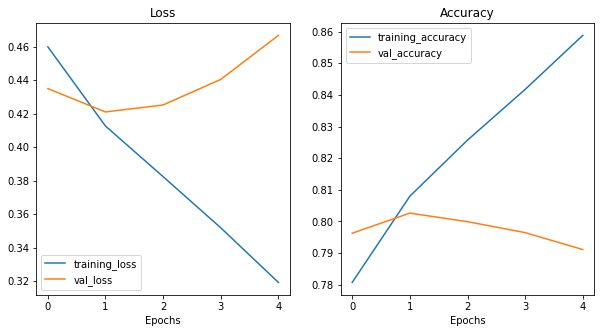

In [ ]:
plot_loss_curves(model_c_history)

Thus model performs at 80% accuracy. 

## Conclusion and Future work

* Different models can be experimented. 
* Transfer Learning of word-embeddings can be explored. 

## References


* https://bth.diva-portal.org/smash/get/diva2:1454870/FULLTEXT02.pdf 
* https://dzlab.github.io/dltips/en/tensorflow/textvectorization-preprocessing/ 
* https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/  
* https://www.kaggle.com/code/aravindanr22052001/sentimentanalysis 
* https://www.kaggle.com/code/raaavan/fully-connected-and-bidirectional-lstm/notebook 
